In [1]:
import pandas as pd
import joblib

# Récupération des données vectorisées à l'aide de TFIDF  dans la partie précédente.
X_train = joblib.load("X_train_final_tfidf.pkl")
y_train = joblib.load("y_train_final.pkl")
X_test = joblib.load("X_test_vec.pkl")
y_test = joblib.load("y_test.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [2]:
# Import pour les différents modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

# Import Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Import pour les matrices de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création du dossier où enregistrer les modèles
import os
os.makedirs("Models", exist_ok=True)

In [3]:
# RIDGE CLASSIFIER

ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train, y_train)

# Prédiction
y_pred_rdg = ridge_clf.predict(X_test)

# Rapport
report_rdg = classification_report(y_test, y_pred_rdg, output_dict=True)
print("Classification Report :\n")
print(classification_report(y_test, y_pred_rdg))

# Score
acc_rdg = accuracy_score(y_test, y_pred_rdg)
f1_rdg = report_rdg["macro avg"]["f1-score"]

# Enregistrement du modèle
joblib.dump(ridge_clf, "Models/ridge_classifier.pkl")
np.save("Predictions/y_pred_rdg.npy", y_pred_rdg)

Classification Report :

              precision    recall  f1-score   support

          10       0.49      0.42      0.45       623
          40       0.71      0.63      0.67       496
          50       0.72      0.78      0.75       329
          60       0.82      0.84      0.83       163
        1140       0.74      0.83      0.78       533
        1160       0.93      0.92      0.92       790
        1180       0.56      0.63      0.59       153
        1280       0.74      0.54      0.63       969
        1281       0.52      0.55      0.53       408
        1300       0.87      0.95      0.91      1001
        1301       0.86      0.92      0.89       139
        1302       0.79      0.83      0.81       475
        1320       0.85      0.82      0.84       645
        1560       0.84      0.83      0.83      1000
        1920       0.87      0.94      0.90       816
        1940       0.79      0.94      0.86       160
        2060       0.81      0.76      0.79       969
  

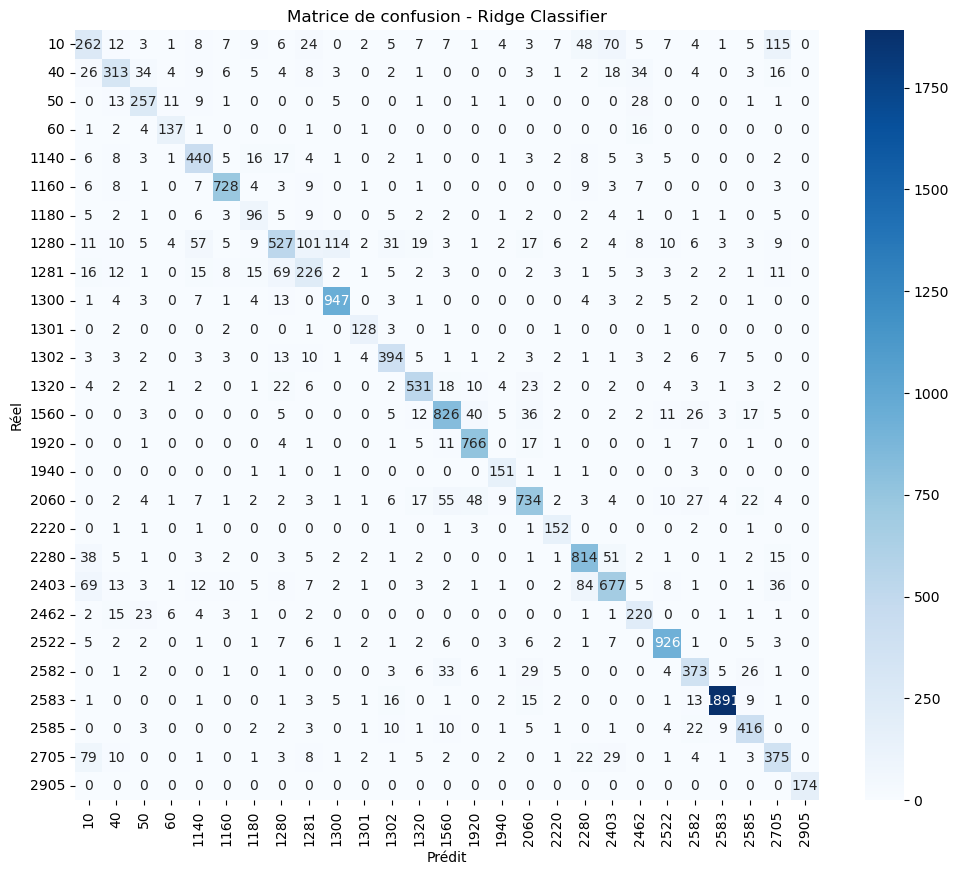

In [5]:
# Matrice de confusion
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_rdg)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Matrice de confusion - Ridge Classifier")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

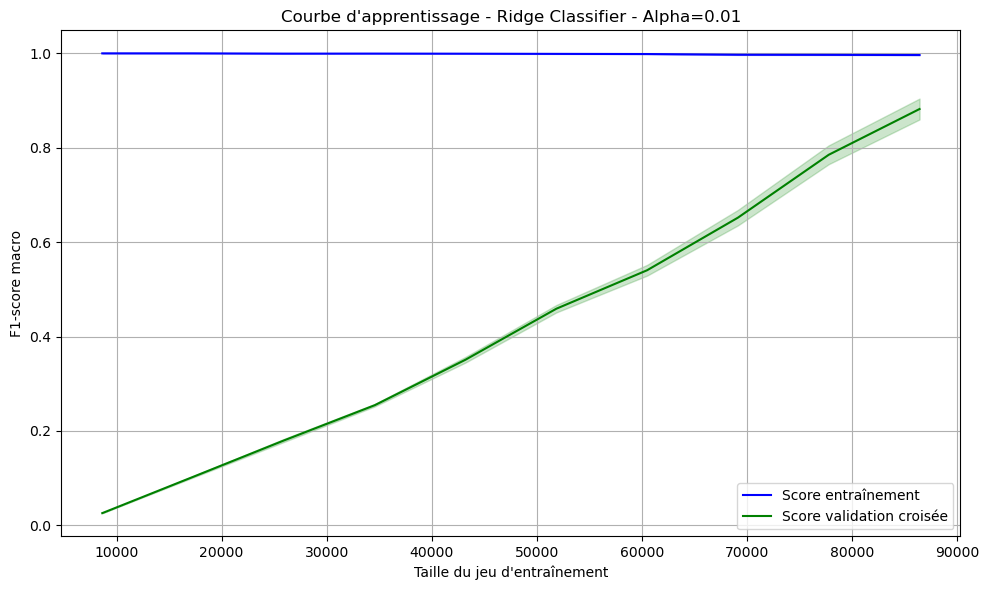

In [6]:
# Courbe d'apprentissage

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    RidgeClassifier(alpha=0.01),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Ridge Classifier - Alpha=0.01")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score entraînement = 1.0 indépendamment de la taille du jeu d'entrainement. Il y a donc un surapprentissage évident
- Le score validation croisée faible au départ, puis monte progressivement jusqu'à atteindre environ 0.85. Cependant, il ne rejoint pas la courbe d'entrainement. Le modèle n'arrive donc pas à généraliser.


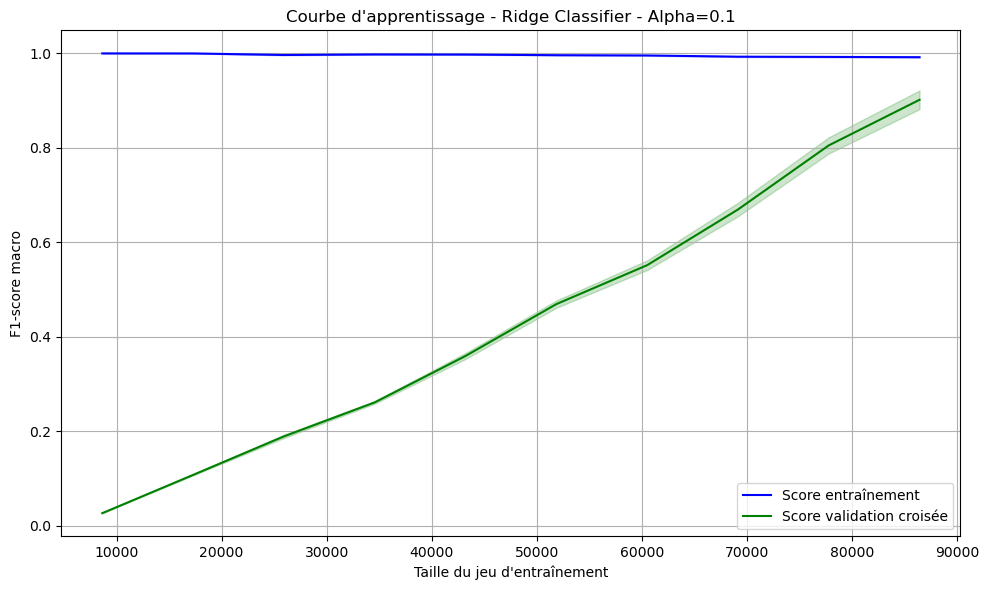

In [7]:
# Courbe d'apprentissage

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    RidgeClassifier(alpha=0.1),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Ridge Classifier - Alpha=0.1")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Même analyse que pour Alpha = 0.01

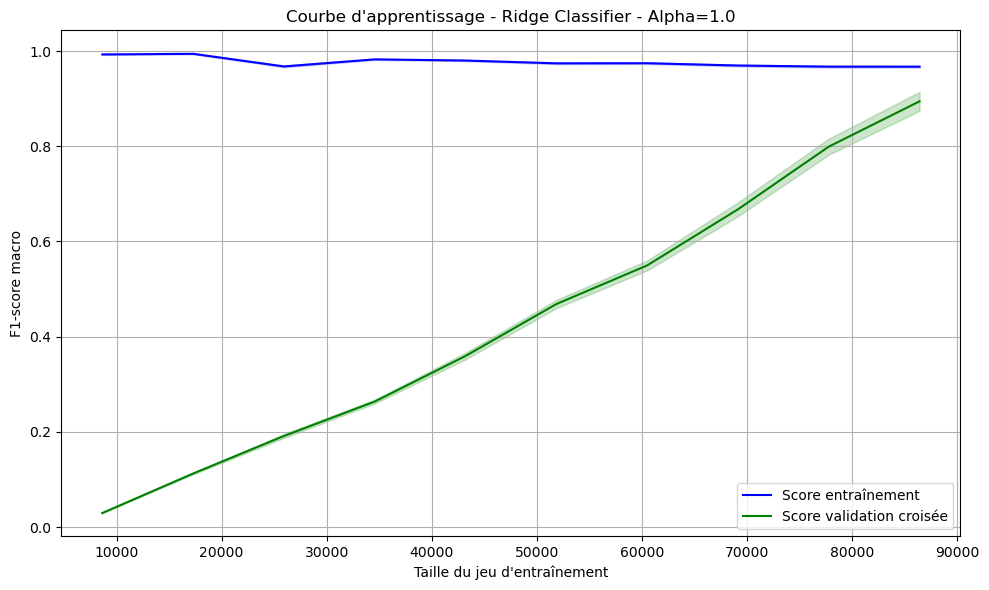

In [8]:
# Courbe d'apprentissage

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    RidgeClassifier(alpha=1.0),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Ridge Classifier - Alpha=1.0")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score d'entrainement reste élevé, mais est plus réaliste, en terminant aux alentours de 0.95
- Le score de validation est bon, et se rapproche des 0.90.
- Le modèle est meilleure que les 2 précents Alpha, mais il reste un écart entre entrainement et validation.

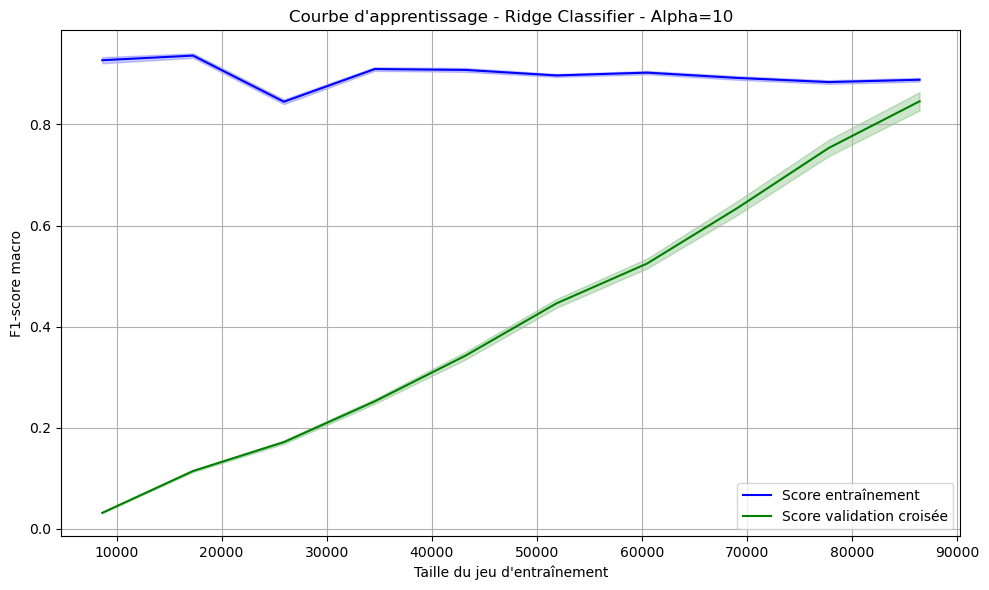

In [11]:
# Courbe d'apprentissage

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    RidgeClassifier(alpha=10),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Ridge Classifier - Alpha=10")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score d'entrainement diminue encore un peu par rapport à la courbe précédente, mais reste très bon (0.90)
- Le score de validation se rapproche très fortement de la courbe d'apprentissage, il y a moins d'overfitting que pour les courbes précédentes.

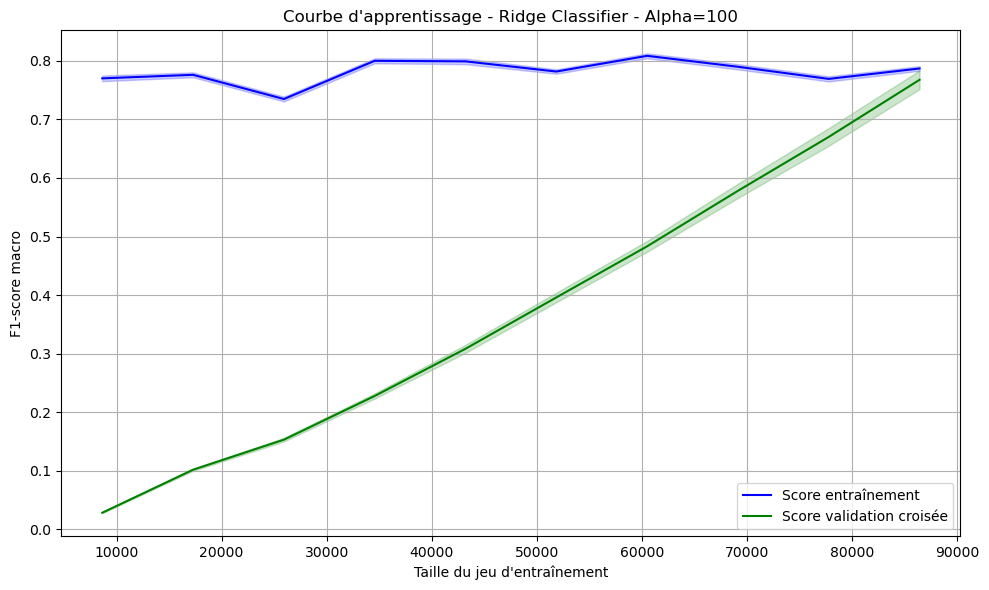

In [12]:
# Courbe d'apprentissage

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    RidgeClassifier(alpha=100),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Ridge Classifier - Alpha=100")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score d'apprentissage est trop faible par rapport aux tests précédents (~ 0.78). Il y a sans doute un sous-apprentissage
- Idem pour le score de validation. Bien qu'il rejoigne le score d'apprentissage, le score atteint est trop faible par rapport aux tests précédents (~0.76)

Conclusion : Nous en concluons que le meilleur compromis est celui avec le paramètre alpha = 10 qui a une courbe d'entrainement élevée et écart avec le score de validation relativement faible..

In [15]:
# RIDGE CLASSIFIER avec Alpha = 10

ridge_clf = RidgeClassifier(alpha=10.0)
ridge_clf.fit(X_train, y_train)

# Prédiction
y_pred_rdg = ridge_clf.predict(X_test)

# Rapport
report_rdg = classification_report(y_test, y_pred_rdg, output_dict=True)
print("Classification Report :\n")
print(classification_report(y_test, y_pred_rdg))

# Score
acc_rdg = accuracy_score(y_test, y_pred_rdg)
f1_rdg = report_rdg["macro avg"]["f1-score"]

# Enregistrement du modèle
joblib.dump(ridge_clf, "Models/ridge_classifier.pkl")
np.save("Predictions/y_pred_rdg.npy", y_pred_rdg)

Classification Report :

              precision    recall  f1-score   support

          10       0.46      0.43      0.44       623
          40       0.73      0.59      0.65       496
          50       0.70      0.79      0.74       329
          60       0.82      0.83      0.83       163
        1140       0.71      0.82      0.76       533
        1160       0.91      0.90      0.90       790
        1180       0.50      0.68      0.57       153
        1280       0.77      0.46      0.57       969
        1281       0.51      0.53      0.52       408
        1300       0.83      0.93      0.88      1001
        1301       0.85      0.94      0.89       139
        1302       0.76      0.80      0.78       475
        1320       0.82      0.77      0.79       645
        1560       0.83      0.79      0.81      1000
        1920       0.84      0.93      0.88       816
        1940       0.69      0.96      0.81       160
        2060       0.79      0.73      0.76       969
  

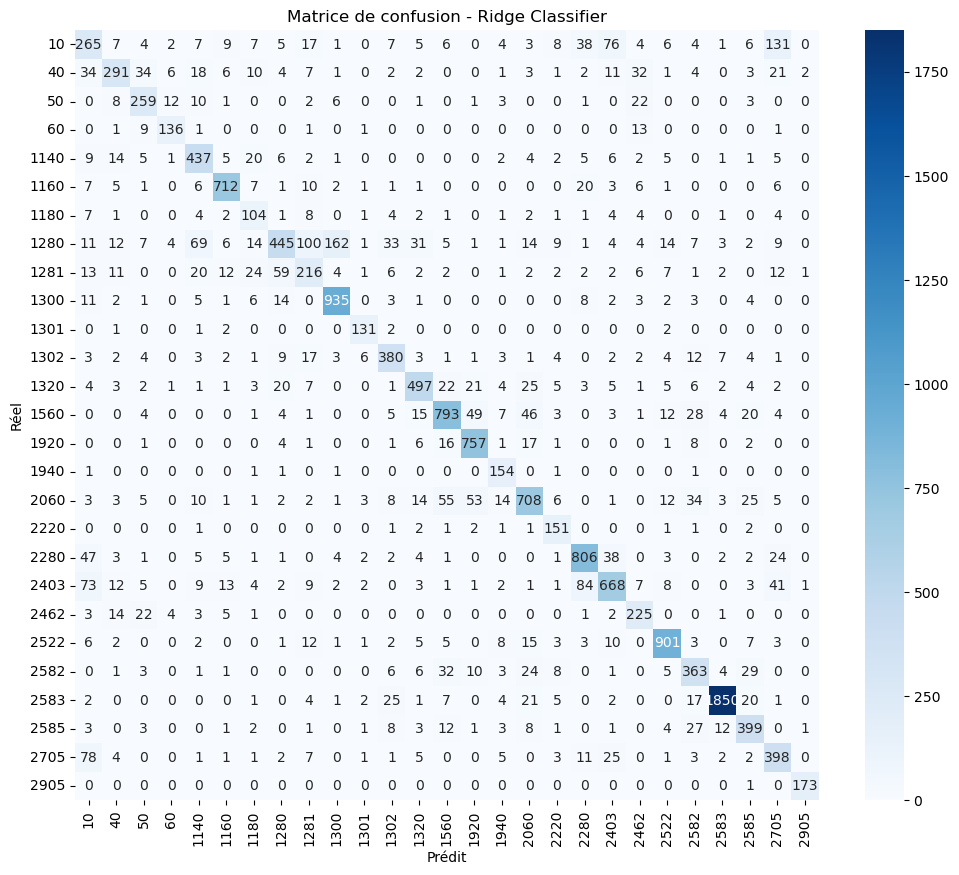

In [16]:
# Matrice de confusion
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_rdg)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Matrice de confusion - Ridge Classifier")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [17]:
# Importance des mots

# Récupère les noms de mots
feature_names = vectorizer.get_feature_names_out()
coefficients = ridge_clf.coef_

# Pour les 5 mots les plus importants par classe
for i, class_label in enumerate(ridge_clf.classes_):
    top_features = np.argsort(coefficients[i])[-5:]
    print(f"\nClasse {class_label} : Top mots")
    for feat in reversed(top_features):
        print(f"  {feature_names[feat]} ({coefficients[i][feat]:.3f})")


Classe 10 : Top mots
  guide (0.922)
  introduction (0.887)
  philosophie (0.855)
  ammareal (0.818)
  tom (0.776)

Classe 40 : Top mots
  import (2.942)
  magideal (2.371)
  jap (1.494)
  version (1.490)
  japonais (1.430)

Classe 50 : Top mots
  gaming (1.967)
  filaire (1.632)
  ps4 (1.614)
  gamer (1.570)
  skylander (1.563)

Classe 60 : Top mots
  nom (1.385)
  oui (1.370)
  affichage (1.135)
  communication (1.122)
  to (1.064)

Classe 1140 : Top mots
  figurine (3.478)
  shirt (2.215)
  gundam (2.036)
  magnet (1.806)
  figurer (1.705)

Classe 1160 : Top mots
  mtg (2.951)
  vf (2.937)
  pokemon (2.381)
  vo (2.085)
  adrenalyn (2.058)

Classe 1180 : Top mots
  heroclix (3.393)
  warhammer (2.536)
  oop (1.986)
  role (1.925)
  august (1.742)

Classe 1280 : Top mots
  doudou (2.923)
  poupee (1.726)
  puzzle (1.498)
  peluche (1.289)
  kinder (1.217)

Classe 1281 : Top mots
  societe (1.686)
  carte (1.535)
  tarot (1.466)
  domino (1.463)
  educatif (1.403)

Classe 1300 : Top 

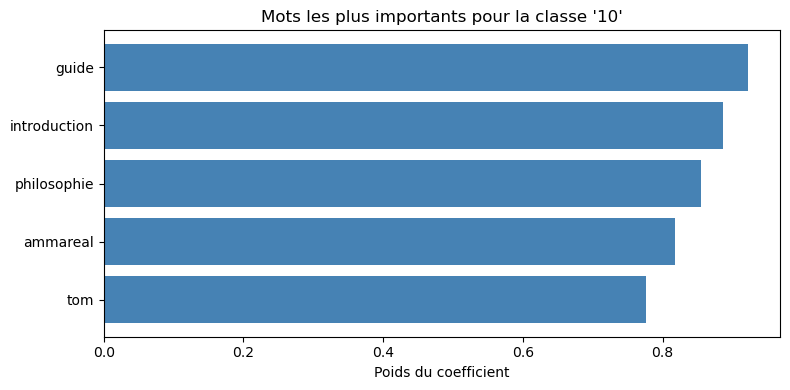

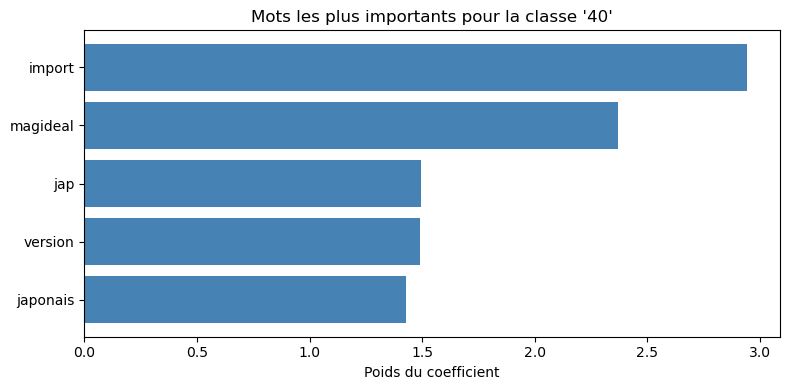

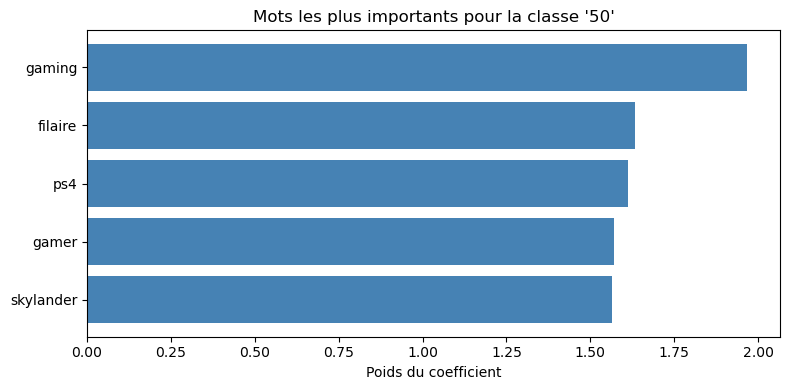

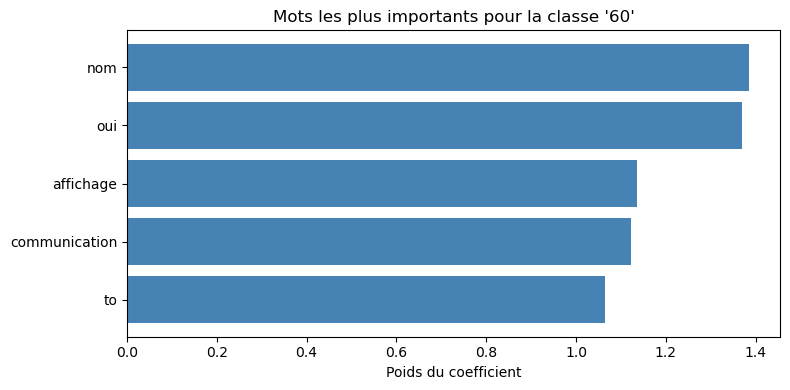

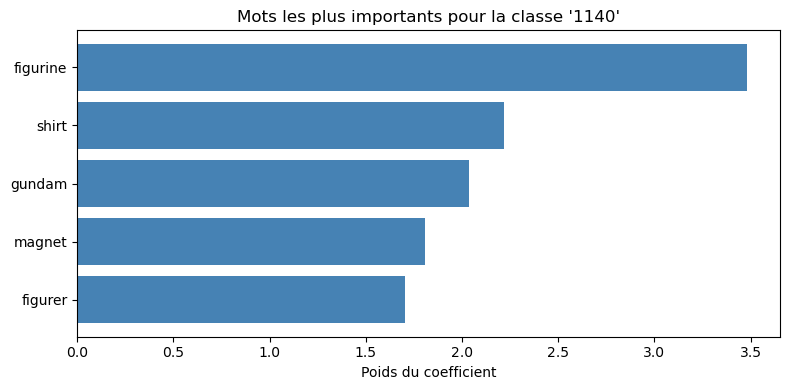

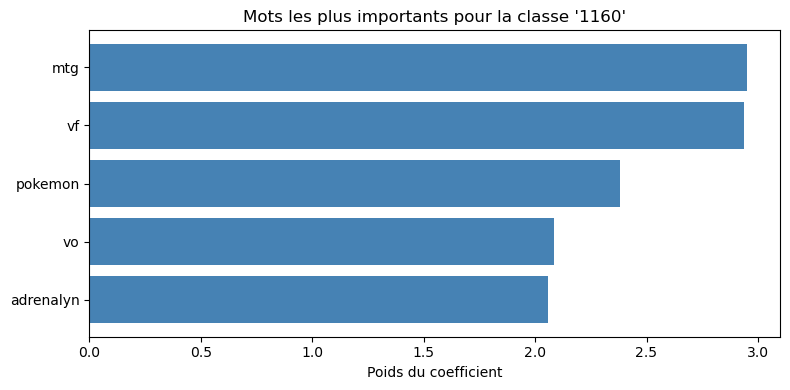

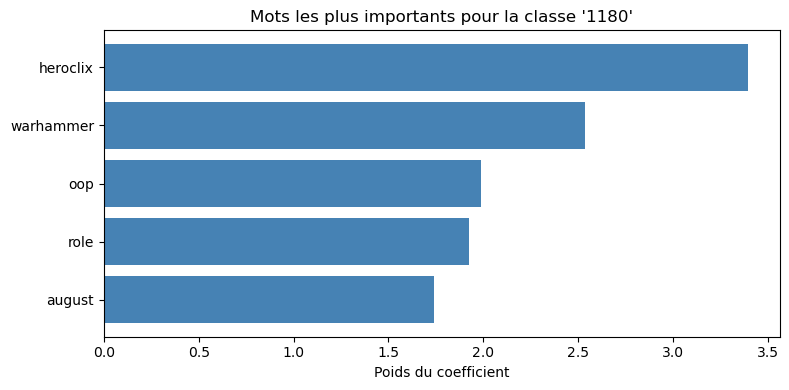

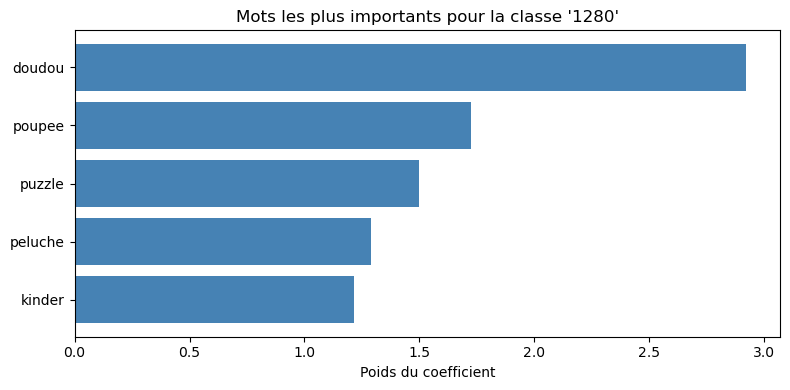

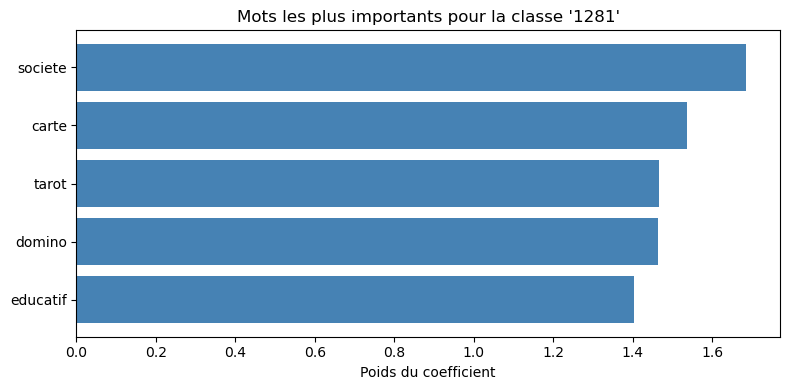

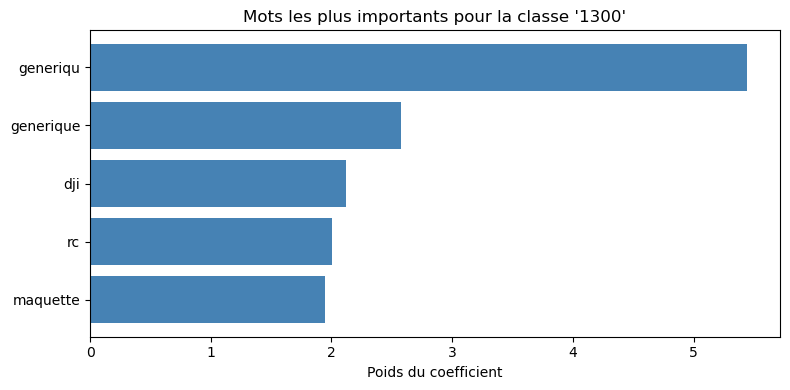

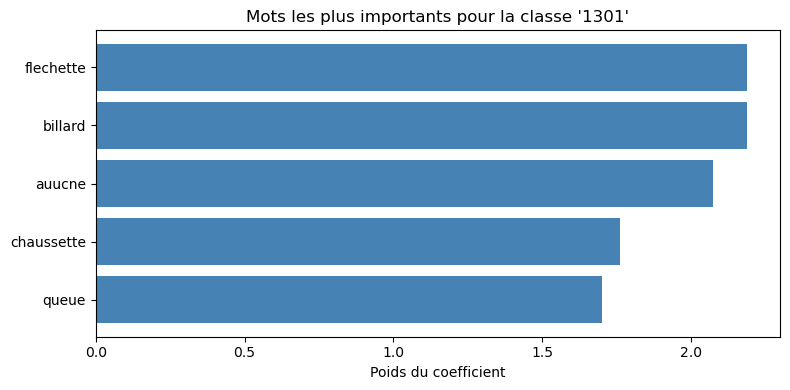

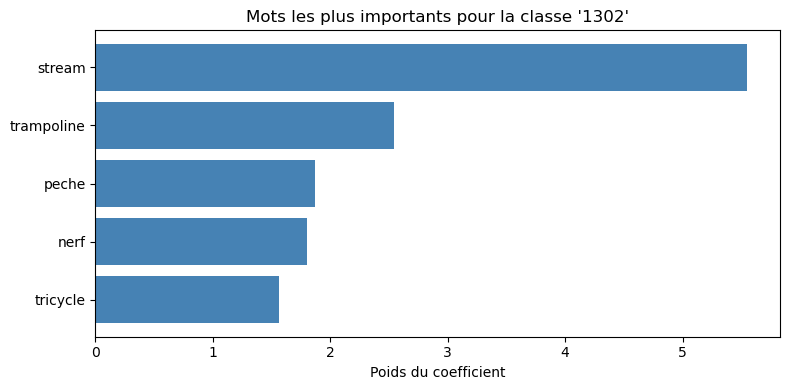

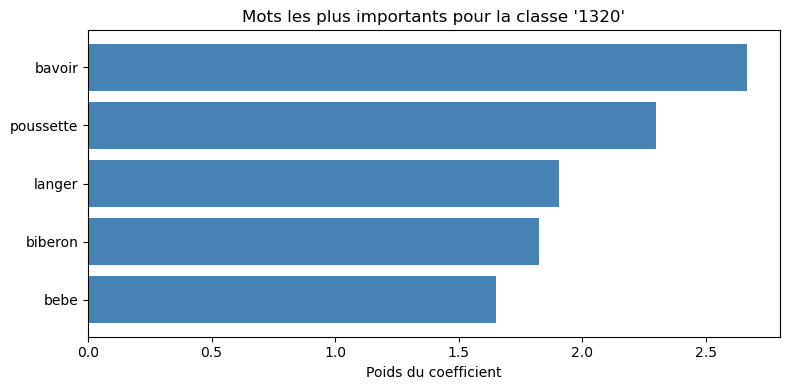

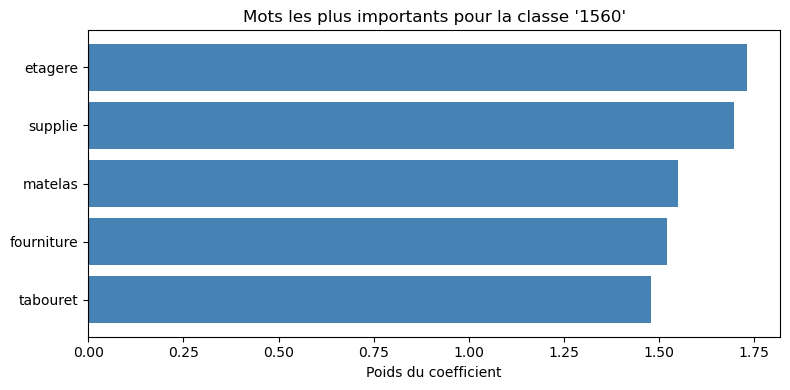

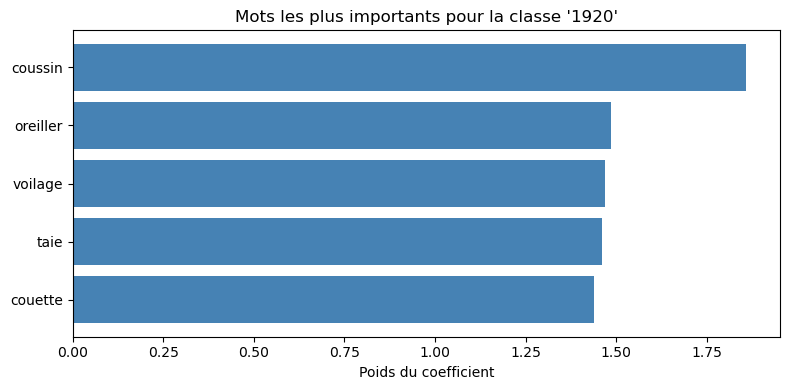

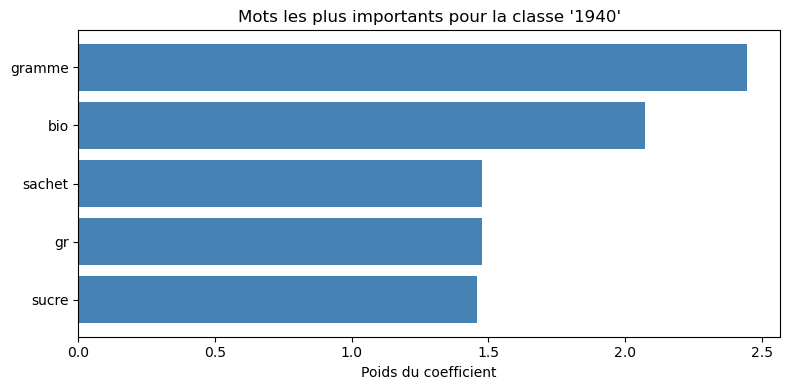

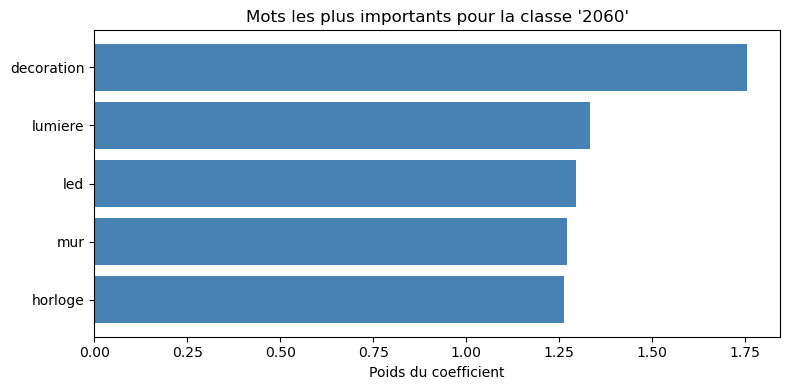

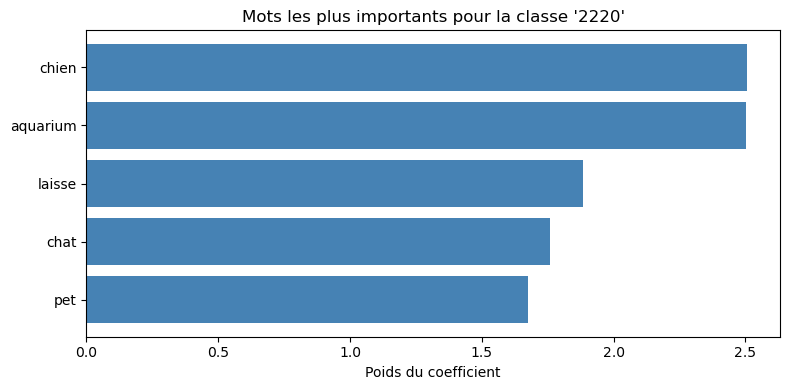

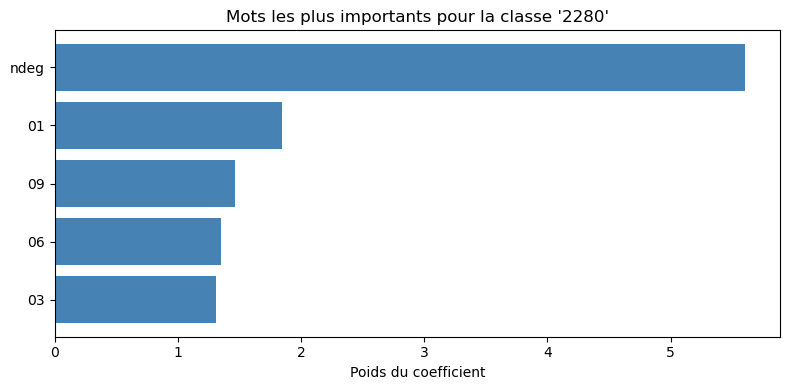

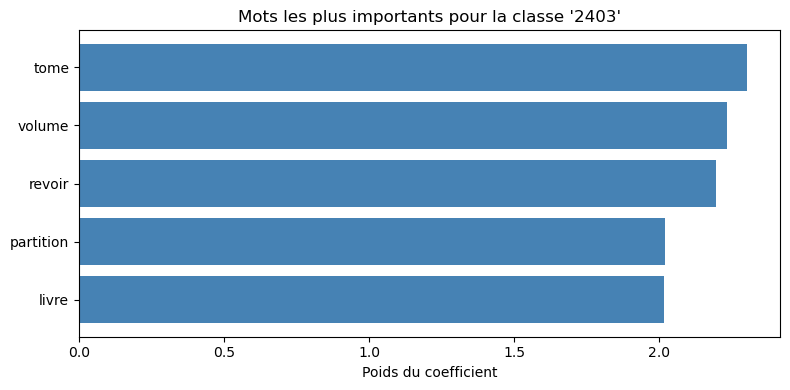

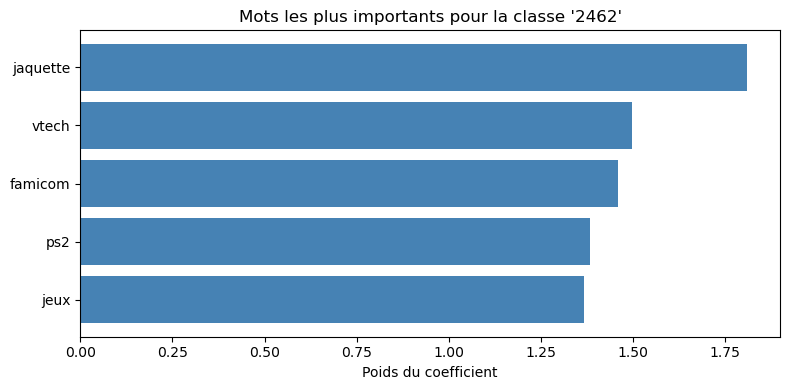

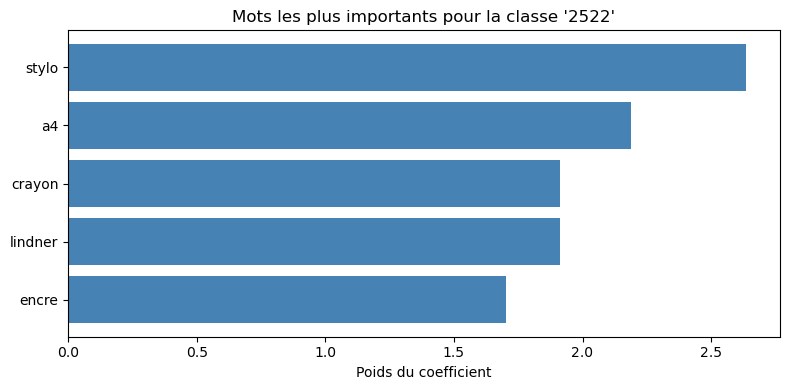

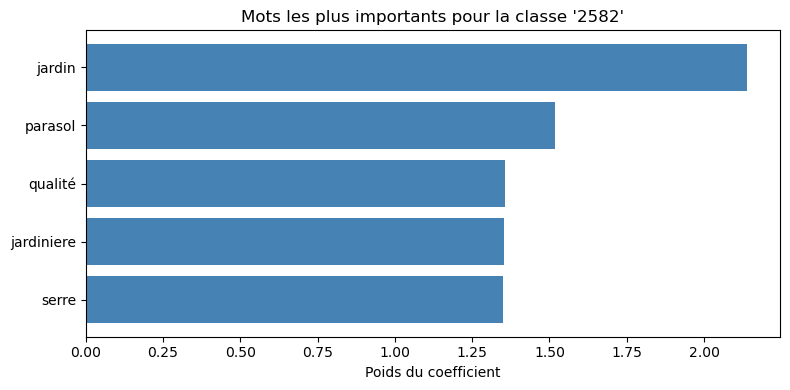

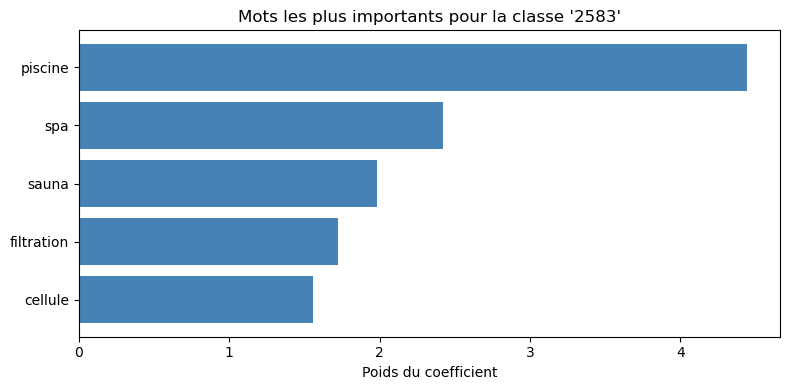

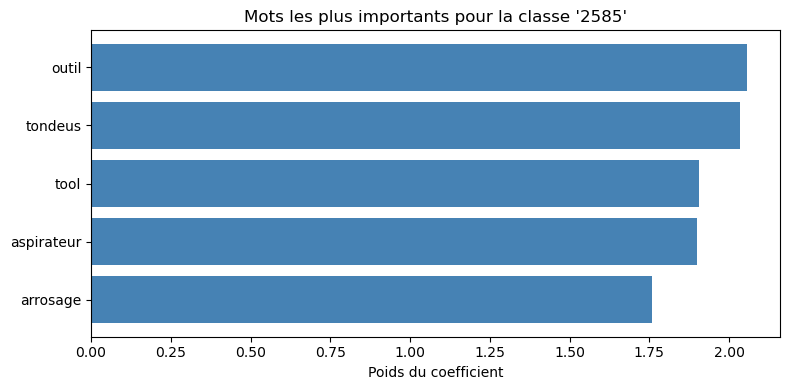

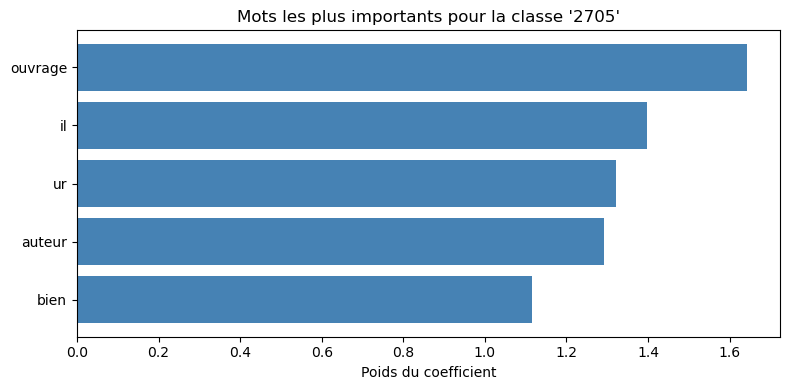

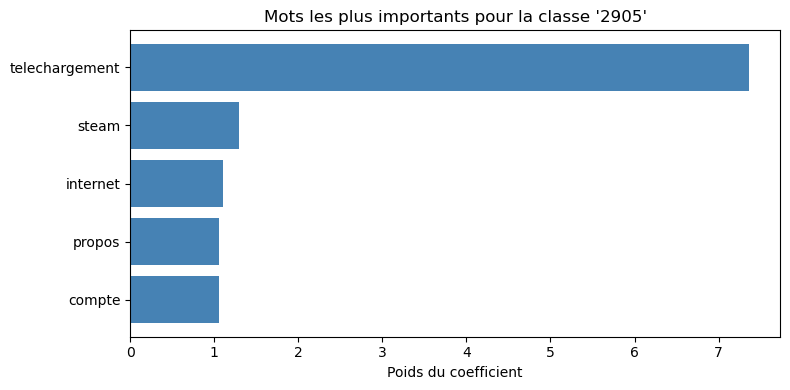

In [18]:
# Graphique des mots les plus influents

import matplotlib.pyplot as plt

for i, class_label in enumerate(ridge_clf.classes_):
    top_feats_idx = np.argsort(coefficients[i])[-5:]
    top_feats = feature_names[top_feats_idx]
    top_coefs = coefficients[i][top_feats_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(top_feats, top_coefs, color="steelblue")
    plt.xlabel("Poids du coefficient")
    plt.title(f"Mots les plus importants pour la classe '{class_label}'")
    plt.tight_layout()
    plt.show()